# Linear Regression Loss Analysis for  Iris Petal Width Prediction

In [1]:
# import numpy, tensorflow, and matplotlib.pyplot modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops


#import Iris dataset
from sklearn import datasets

C:\Users\trevo\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


First Train Linear Regression Models with L1 and L2 Loss Functions at a 0.05 Learning Rate

In [2]:
#load Iris dataset
iris = datasets.load_iris()

# Establish feature arrays with sepal lengths and petal widths
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Establish a tensorflow graph session
sess = tf.Session()

# Define learning rate
learning_rate = 0.05

# Define the number of learning iterations
iterations = 50

# Define batch size
batch_size = 25

# Establish tensorflow placeholders for graph session data feeding of
# iris features and classification targets from a single column array
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],  dtype=tf.float32)

# Define the variable A weight and b bias for the tensorflow graph session 
# to learn and modify

# Initialize weight A with a random value 
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Initialize bias b with a random value 
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [3]:
# Define the graph model operations
my_output = tf.add(tf.matmul(x_data, A), b)

# Define the loss function over each batch
loss_l1 = tf.reduce_mean(tf.abs(y_target - my_output))

# Initialize variable for graphic session
init = tf.global_variables_initializer()
sess.run(init)

# Define gradient descent optimization algorithm for graphic session
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)

In [4]:
# loop for L1 graphic training sessions

# Establish list vector of batch loss 1 values
loss_vector_l1_list = []

# loop for model training defined number of iterations
for i in range(0,iterations):
    # Generate random numbers based on training data and batch size
    rand_index = np.random.choice(len(x_vals), size = batch_size)
    # Select random x feature value (sepal length) and y target value (petal width) for training
    # requires numpy transpose to match placeholder shape
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    # run graphic training sessions with feed placeholder data
    sess.run(train_step_l1, feed_dict={x_data:rand_x, y_target:rand_y})
    # run graphic session to compute batch loss values
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vector_l1_list.append(temp_loss_l1)
    # Display algorithm status after each block on 25 iterations
    if ((i+1)%25 == 0):
        print('Step#{} A = {}'.format((i+1),sess.run(A)))
        print('Loss = {}'.format(temp_loss_l1))


Step#25 A = [[1.6241573]]
Loss = 2.5857229232788086
Step#50 A = [[2.3603573]]
Loss = 0.8810665607452393


In [5]:
# Model with loss 2 function

# Define the loss function over each batch
loss_l2 = tf.reduce_mean(tf.square(y_target - my_output))

# Initialize variable to reset graphic session
init = tf.global_variables_initializer()
sess.run(init)

# Define gradient descent optimization algorithm for graphic session
my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step_l2 = my_opt_l1.minimize(loss_l2)

In [6]:
# loop for L2 graphic training sessions

# Establish list vector of batch loss 2 values
loss_vector_l2_list = []

# loop for model training defined number of iterations
for i in range(0,iterations):
    # Generate random numbers based on training data and batch size
    rand_index = np.random.choice(len(x_vals), size = batch_size)
    # Select random x feature value (sepal length) and y target value (petal width) for training
    # requires numpy transpose to match placeholder shape
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    # run graphic training sessions with feed placeholder data
    sess.run(train_step_l2, feed_dict={x_data:rand_x, y_target:rand_y})
    # run graphic session to compute batch loss values
    temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vector_l2_list.append(temp_loss_l2)
    # Display algorithm status after each block on 25 iterations
    if ((i+1)%25 == 0):
        print('Step#{} A = {}'.format((i+1),sess.run(A)))
        print('Loss = {}'.format(temp_loss_l2))


Step#25 A = [[1.620593]]
Loss = 0.7846009135246277
Step#50 A = [[1.272342]]
Loss = 0.32966044545173645


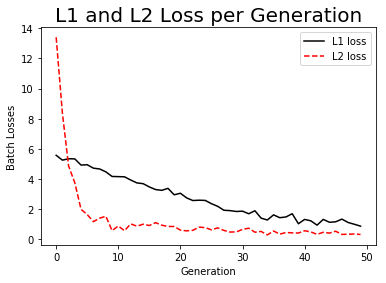

In [7]:
#Visualize of model loss values with 0.4 learning Rate

#Plot L1 and L2 batch Losses
plt.plot(loss_vector_l1_list, 'k-', label= 'L1 loss')
plt.plot(loss_vector_l2_list, 'r--', label= 'L2 loss')
plt.title('L1 and L2 Loss per Generation', fontsize = 20)
plt.xlabel('Generation')
plt.ylabel('Batch Losses')
plt.legend(loc='upper right')
plt.show()

Update Learning Rate to 0.4

In [8]:
# Reset graphic session
ops.reset_default_graph()

# Establish a tensorflow graph session
sess = tf.Session()

# Establish tensorflow placeholders for graph session data feeding of
# iris features and classification targets from a single column array
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],  dtype=tf.float32)

# Define the variable A weight and b bias for the tensorflow graph session 
# to learn and modify

# Initialize weight A with a random value 
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Initialize bias b with a random value 
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Update learning rate
learning_rate = 0.4

# Define the graph model operations
my_output = tf.add(tf.matmul(x_data, A), b)

In [9]:
# Define the loss function over each batch
loss_l1 = tf.reduce_mean(tf.abs(y_target - my_output))

# Initialize variable for graphic session
init = tf.global_variables_initializer()
sess.run(init)

# Define gradient descent optimization algorithm for graphic session
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)

# loop for L1 graphic training sessions

# Initialize variable to reset graphic session
init = tf.global_variables_initializer()
sess.run(init)

# Establish list vector of batch loss 1 values
loss_vector_l1_list = []

# loop for model training defined number of iterations
for i in range(0,iterations):
    # Generate random numbers based on training data and batch size
    rand_index = np.random.choice(len(x_vals), size = batch_size)
    # Select random x feature value (sepal length) and y target value (petal width) for training
    # requires numpy transpose to match placeholder shape
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    # run graphic training sessions with feed placeholder data
    sess.run(train_step_l1, feed_dict={x_data:rand_x, y_target:rand_y})
    # run graphic session to compute batch loss values
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vector_l1_list.append(temp_loss_l1)
    # Display algorithm status after each block on 25 iterations
    if ((i+1)%25 == 0):
        print('Step#{} A = {}'.format((i+1),sess.run(A)))
        print('Loss = {}'.format(temp_loss_l1))

Step#25 A = [[1.6809295]]
Loss = 0.6366724967956543
Step#50 A = [[0.9881297]]
Loss = 0.4721035361289978


In [10]:
# Define the loss function over each batch
loss_l2 = tf.reduce_mean(tf.square(y_target - my_output))

# Initialize variable to reset graphic session
init = tf.global_variables_initializer()
sess.run(init)

# Define gradient descent optimization algorithm for graphic session
my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step_l2 = my_opt_l1.minimize(loss_l2)
# loop for L2 graphic training sessions

# Initialize variable to reset graphic session
init = tf.global_variables_initializer()
sess.run(init)

# Establish list vector of batch loss 2 values
loss_vector_l2_list = []

# loop for model training defined number of iterations
for i in range(0,iterations):
    # Generate random numbers based on training data and batch size
    rand_index = np.random.choice(len(x_vals), size = batch_size)
    # Select random x feature value (sepal length) and y target value (petal width) for training
    # requires numpy transpose to match placeholder shape
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    # run graphic training sessions with feed placeholder data
    sess.run(train_step_l2, feed_dict={x_data:rand_x, y_target:rand_y})
    # run graphic session to compute batch loss values
    temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vector_l2_list.append(temp_loss_l2)
    # Display algorithm status after each block on 25 iterations
    if ((i+1)%25 == 0):
        print('Step#{} A = {}'.format((i+1),sess.run(A)))
        print('Loss = {}'.format(temp_loss_l2))

Step#25 A = [[461.49628]]
Loss = 943306.875
Step#50 A = [[-20360.607]]
Loss = 2093147392.0


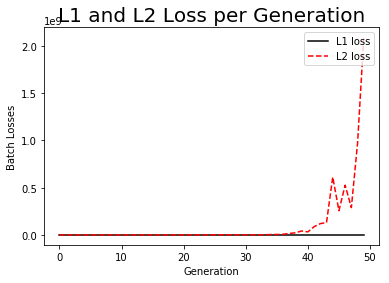

In [11]:
#Visualize of model loss values with 0.4 learning Rate

#Plot L1 and L2 batch Losses
plt.plot(loss_vector_l1_list, 'k-', label= 'L1 loss')
plt.plot(loss_vector_l2_list, 'r--', label= 'L2 loss')
plt.title('L1 and L2 Loss per Generation', fontsize = 20)
plt.xlabel('Generation')
plt.ylabel('Batch Losses')
plt.legend(loc='upper right')
plt.show()

For a larger learning rate, the loss 2 function does not converge as number of modeling iteration steps increases.